In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the datasets
train = pd.read_csv("C:/Users/KUNAL/Downloads/titanic/train.csv", header = 0)
test = pd.read_csv("C:/Users/KUNAL/Downloads/titanic/test.csv", header = 0)

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA
Before running model on data we have to first understand the data.

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

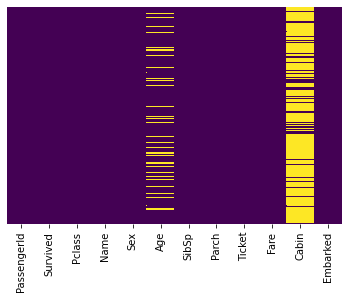

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

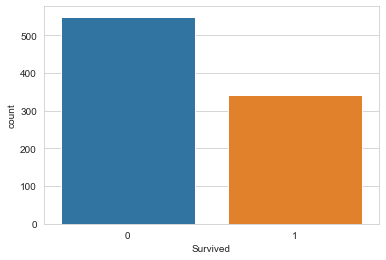

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = 'Survived', data = train)

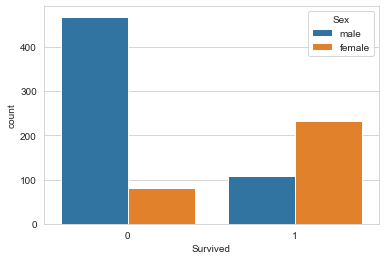

In [9]:
sns.set_style("whitegrid")
sns.countplot(x = 'Survived', hue = 'Sex' ,data = train)

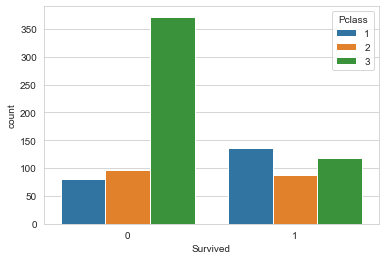

In [10]:
sns.set_style("whitegrid")
sns.countplot(x = 'Survived', hue = 'Pclass' ,data = train)

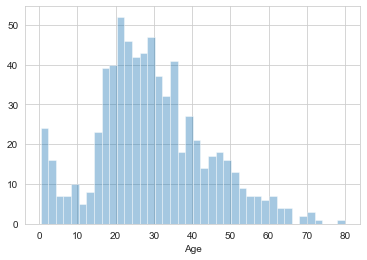

In [11]:
sns.distplot(train.Age.dropna(),kde=False,bins = 40)

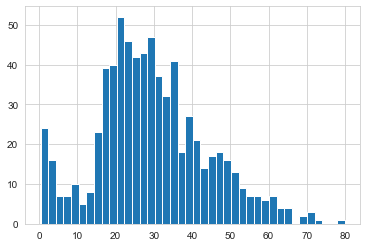

In [12]:
train['Age'].hist(bins=40) # using matplotlib

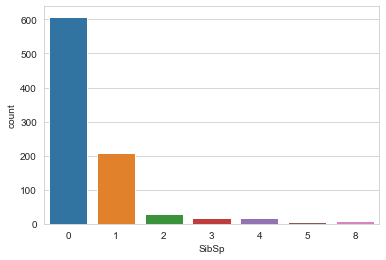

In [13]:
sns.countplot(x='SibSp', data=train)

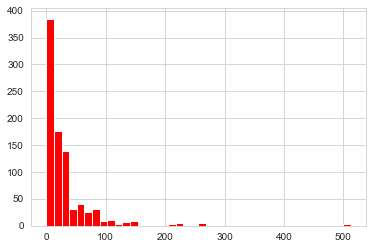

In [14]:
train['Fare'].hist(color='red',bins=40)

# Data Cleaning

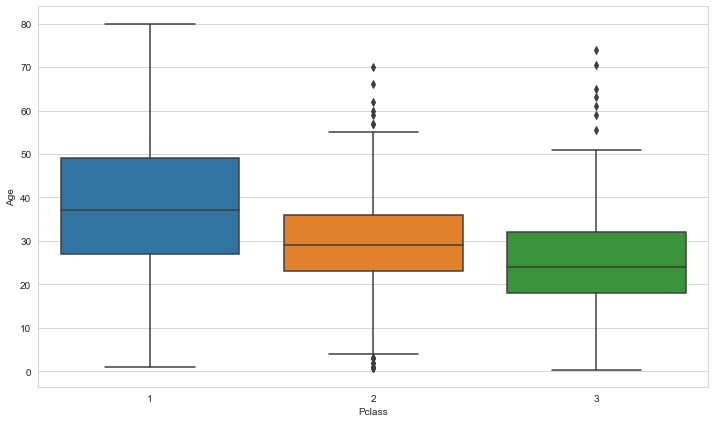

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'Pclass', y= 'Age', data=train)

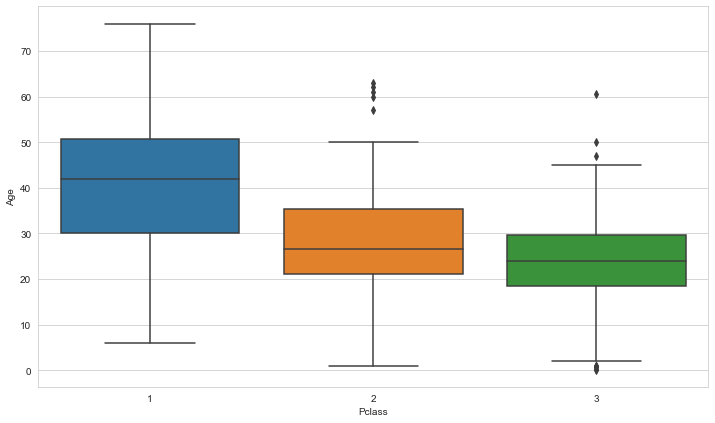

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'Pclass', y= 'Age', data=test)

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [18]:
def impute_age1(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 25
    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis =1)

In [20]:
test['Age'] = test[['Age','Pclass']].apply(impute_age1, axis =1)

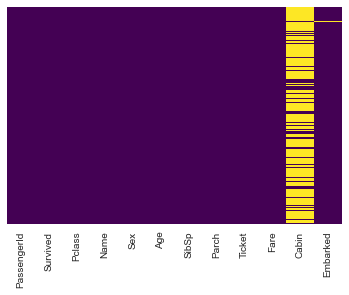

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.drop('Cabin',axis=1,inplace = True)
test.drop('Cabin',axis=1,inplace = True)

In [23]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [25]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
pd.get_dummies(test['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [26]:
pd.get_dummies(train['Sex'],drop_first=True).head()
pd.get_dummies(test['Sex'],drop_first=True).head()

,male
0,1
1,0
2,1
3,1
4,0


In [27]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked1 = pd.get_dummies(test['Embarked'],drop_first=True)
sex1 = pd.get_dummies(test['Sex'],drop_first=True)

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [30]:
train.head()
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [31]:
train = pd.concat([train,sex,embarked],axis=1)
test = pd.concat([test,sex1,embarked1],axis=1)

In [32]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [33]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [34]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [35]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

# Model Fitting

In [36]:
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
reg=RandomForestClassifier()
reg.fit(X_train,y_train)
Survived=pd.DataFrame(reg.predict(test))

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint
reg=GradientBoostingClassifier()
reg.fit(X_train,y_train)
Survived=pd.DataFrame(reg.predict(test))

In [73]:
logregression = LogisticRegression(max_iter=1000)

In [74]:
logregression.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [75]:
Survived =pd.DataFrame(logregression.predict(test))

In [69]:
final_data = pd.concat([test['PassengerId'],Survived],axis=1)

In [70]:
final_data.columns=['PassengerId','Survived']

In [71]:
final_data.to_csv('gender_submission.csv',index=False)